#**Customer Lifetime Value** -

Customer Lifetime Value (also known as CLV or CLTV) is a monetary value that represents the total amount of revenue or profit a customer will give the company over the period of the relationship with the company.
CLV is a quantitative analysis and one of the most important metric to monitor. It shows how healthy you customer base is, and how likely your company is to grow in future.

We can predict CLV by using the equation:

CLV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.



# **Pros and Cons of CLV -**  

* CLV helps to design an effective business plan and also provide a chance to scale your business.
* It draws meaningful customer segments and helps to identify the needs of different segments.
* CLV can figure out the most profitable customers but how to make profit from them, it depends on  our business strategy.
* CLV models can sometimes be misused because companies only focus on finding the best customers and focusing on them, but it is equally important to give attention to other customers also.



# **CLV Implementation in Python (Using Formula) -**

Now we will explore how to apply this formula for finding CLV on an Online Retail Dataset.


**Step 1: Loading the Required Libraries**

In [1]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

**Step 2: Uploading the Dataset**

We'll use pandas read CSV method to load the needed Online Retail dataset.

In [2]:
# Reading the online retail dataset
data = pd.read_excel("Online_Retail.xlsx")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Step 3: Removing Duplicates**

Sometimes we may have unorganized dataset that might contain duplicate entries which will bias our results. So to deal with that pandas provides the drop duplicates() function in Python, which removes duplicate or repeated records.

In [3]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

**Step 4: Data Insights**

<Axes: >

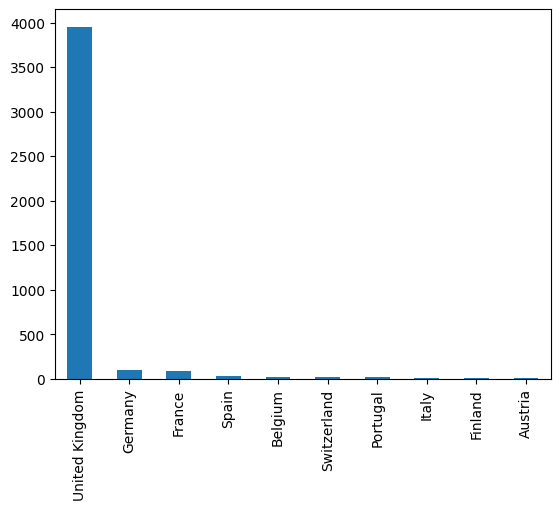

In [4]:
#Top ten country's customer
filtered_data.Country.value_counts()[:10].plot(kind='bar')

The majority of the clients in the dataset are from the "United Kingdom." As a result, we can filter data for customers in the United Kingdom.

In [5]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


**Step 5: The Describe() Function**

The describe function in Pandas is useful for obtaining various summary statistics. The count, mean, standard deviation, minimum and maximum values, and quantiles of the data are returned by this function.

In [6]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


Here, we can observe some of the customers have ordered in a negative quantity, which is not possible. So, we need to filter quantity greater than zero.

In [7]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


**Step 6: Filtering the Required Columns from Dataset**

Here, we can filter the necessary columns for calculating CLTV. We only need five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.

* **CustomerID** will uniquely define your customers.
* **InvoiceDate** help you calculate numbers of days customer stayed with your product.
* **InvoiceNo** helps you to count the number of time transaction performed (frequency).
* **Quantity** is purchased item units in each transaction.
* **UnitPrice** of each unit purchased by the customer will help you to calculate the total purchased amount.

In [8]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

In [21]:
#Calulate total purchase
uk_data.loc[:, 'TotalPurchase'] = uk_data['Quantity'] * uk_data['UnitPrice']

**Step 7: Here, we are going to perform the following operations:**


* Calculate the number of days between the present date and the date of last purchase from each customer.
* Calculate the number of orders for each customer.
* Calculate sum of purchase price for each customer.

In [10]:
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

In [11]:
uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [12]:
# Change the name of columns
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


**Step 8: Calculate CLTV using following formula:**

CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

Customer Value = Average Order Value * Purchase Frequency

1. Calculate Average Order Value

In [13]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

In [14]:
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


2. Calculate Purchase Frequency

In [15]:
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]

3. Calculate Repeat Rate and Churn Rate

In [16]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

In [17]:
#Churn Rate
churn_rate=1-repeat_rate

In [18]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

4. Calculate Profit Margin

 Profit margin is a profitability ratio which represents how much percentage of total sales has earned as the gain. For our calculations let's assume our business has approx 5% profit on the total sale.



In [19]:
# Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


5. Calcualte Customer Lifetime Value

In [20]:
# Customer Value
uk_data_group['CLV']=(uk_data_group['avg_order_value']*purchase_frequency)/churn_rate

#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CLV']*uk_data_group['profit_margin']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06
